# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Результаты исследования будут учтены при построении модели кредитного скоринга.

**Задачи исследования** — ответить на вопросы:

1. Есть ли зависимость между наличием детей и возвратом кредита в срок?
2. Есть ли зависимость между семейным положением и возвратом кредита в срок?
3. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
4. Как разные цели кредита влияют на его возврат в срок?

**Ход исследования**

Входные данные от банка — статистика о платёжеспособности клиентов — получены из файла data.csv. О качестве данных ничего не известно. Поэтому перед тем, как отвечать на вопрсы исследования и делать вывод, понадобится обзор данных.

Проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки, поищем возможность исправить самые критичные ошибки данных.

После ответа на поставленные в исследовании вопросы, сделаем общий вывод.

Таким образом, исследование пройдёт в четыре этапа:

1. Обзор данных;
2. Предобработка данных;
3. Ответы на вопросы исследования;
4. Общий вывод.

## Этап 1. Обзор данных
Составим первое представление о данных статистики о платежеспособности клиентов.

In [29]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
import pprint

import matplotlib.pyplot as plt
import seaborn as sns

from pymystem3 import Mystem
from collections import Counter

In [30]:
# Прочитаем файл data.csv из папки и сохраним его в переменной df
df = pd.read_csv(r"C:\Users\data.csv")

In [31]:
# Выведем первые 10 строк датафрейма
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [32]:
# Выведем основную информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [33]:
# Посмотрим описательные статистики датасета
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


Для наглядности работы со столбцами отобразим их название:
* *children* — количество детей в семье
* *days_employed* — общий трудовой стаж в днях
* *dob_years* — возраст клиента в годах
* *education* — уровень образования клиента
* *education_id* — идентификатор уровня образования
* *family_status* — семейное положение
* *family_status_id* — идентификатор семейного положения
* *gender* — пол клиента
* *income_type* — тип занятости
* *debt* — имел ли задолженность по возврату кредитов
* *total_income* — ежемесячный доход
* *purpose* — цель получения кредита

**Вывод**

В данных видны следующие проблемы:
* Отрицательные значения в колонках с количеством детей в семье и общим трудовым стажем в днях;
* Пропущенные строки в колонках с общим трудовым стажем в днях и ежемесячным доходом;
* Некорректные наименования колонок;
* Некорректные типы данных — в колонках с общим трудовым стажем в днях и ежемесячным доходом присутствует плавающая точка;
* Некорректный тип данных для анализа — данные в колонке с общим трудовым стажем в днях лучше перевести в года;
* Прыгающий регистр букв в колонке с уровнем образования клиента;
* Наличие дублирующих признаков — помимо самого уровня образования клиента и его семейного положения также имеются идентификаторы этих признаков;
* Неизвестна единица измерения ежемесячного дохода;
* Минимальное значение в колонке с возрастом клиента в годах — 0.

## Этап 2. Предобработка данных

Подкорректируем наименования колонок, поищем пропуски значений и дубликаты, исследуем данные по столбцам.

### Наименования колонок

In [34]:
# Выведем список с наименованиями колонок
df.columns.tolist()

['children',
 'days_employed',
 'dob_years',
 'education',
 'education_id',
 'family_status',
 'family_status_id',
 'gender',
 'income_type',
 'debt',
 'total_income',
 'purpose']

In [35]:
# Переименуем столбцы
cols = ['number_of_children',
        'days_employed',
        'client_age_in_years',
        'education_level',
        'education_level_id',
        'family_status',
        'family_status_id',
        'gender',
        'employment_type',
        'credit_repayment_status',
        'monthly_income',
        'credit_purpose'
       ]
df.set_axis(cols, axis='columns', inplace=True)

In [36]:
# Альтернативный способ переименования столбцов
# df.columns = ['number_of_children',
#         'days_employed',
#         'client_age_in_years',
#         'education_level',
#         'education_level_id',
#         'family_status',
#         'family_status_id',
#         'gender',
#         'employment_type',
#         'credit_repayment_status',
#         'monthly_income',
#         'credit_purpose'
#        ]

In [37]:
# Убедимся, что столбцы переименованы
df.columns.tolist()

['number_of_children',
 'days_employed',
 'client_age_in_years',
 'education_level',
 'education_level_id',
 'family_status',
 'family_status_id',
 'gender',
 'employment_type',
 'credit_repayment_status',
 'monthly_income',
 'credit_purpose']

Для наглядности работы со столбцами отобразим их новые название:
* *number_of_children* — количество детей в семье
* *days_employed* — общий трудовой стаж в днях
* *client_age_in_years* — возраст клиента в годах
* *education_level* — уровень образования клиента
* *education_level_id* — идентификатор уровня образования
* *family_status* — семейное положение
* *family_status_id* — идентификатор семейного положения
* *gender* — пол клиента
* *employment_type* — тип занятости
* *credit_repayment_status* — имел ли задолженность по возврату кредитов
* *monthly_income* — ежемесячный доход
* *credit_purpose* — цель получения кредита

### Пропуски значений

In [38]:
# Посчитаем, сколько в таблице пропущенных значений
df.isna().sum()

number_of_children            0
days_employed              2174
client_age_in_years           0
education_level               0
education_level_id            0
family_status                 0
family_status_id              0
gender                        0
employment_type               0
credit_repayment_status       0
monthly_income             2174
credit_purpose                0
dtype: int64

Обзор недостающих данных показывает, что в колонках с общим трудовым стажем в днях и ежемесячным доходом наблюдается одинаковое количество пропущенных значений. Исходя из этого, можем сделать несколько предположений:
* Эти клиенты никогда не работали в силу своей молодости;
* Эти клиенты работали неофициально;
* Была произведена некорректная выгрузка данных.

In [39]:
# Уточним пропуски значений по типу занятости
df[df['days_employed'].isna() == True]['employment_type'].value_counts()

сотрудник          1105
компаньон           508
пенсионер           413
госслужащий         147
предприниматель       1
Name: employment_type, dtype: int64

In [40]:
# Заменим пропуски на нули
# Подставлять средние или медианные значения некорректно, так как это повысит шанс получения кредита, 
# качество данных при этом не увеличится
df['days_employed'] = df['days_employed'].fillna(0)
df['monthly_income'] = df['monthly_income'].fillna(0)

In [41]:
# Убедимся, что в таблице не осталось пропусков. Для этого ещё раз посчитаем пропущенные значения
df.isna().sum()

number_of_children         0
days_employed              0
client_age_in_years        0
education_level            0
education_level_id         0
family_status              0
family_status_id           0
gender                     0
employment_type            0
credit_repayment_status    0
monthly_income             0
credit_purpose             0
dtype: int64

### Дубликаты

In [42]:
# Посчитаем явные дубликаты в таблице
df.duplicated().sum()

54

In [43]:
# Удалим дубликаты и сбросим индекс
df = df.drop_duplicates().reset_index(drop=True)

In [44]:
# Убедимся, что в таблице не осталось дубликатов. Для этого ещё раз посчитаем все повторяющиеся значения
df.duplicated().sum()

0

In [45]:
# Выведем первые десять строчек датафрейма
df.head(10)

,number_of_children,days_employed,client_age_in_years,education_level,education_level_id,family_status,family_status_id,gender,employment_type,credit_repayment_status,monthly_income,credit_purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


### Исследование данных по столбцам

#### Количество детей в семье клиента

In [46]:
# Посмотрим на уникальные значения количества детей в семье, посчитаем количество таких строк
df['number_of_children'].value_counts()

 0     14107
 1      4809
 2      2052
 3       330
 20       76
-1        47
 4        41
 5         9
Name: number_of_children, dtype: int64

In [47]:
# Скорее всего значение -1 является ошибкой лишнего знака. Поэтому заменим значение -1 на 1
df['number_of_children'] = df['number_of_children'].replace(-1, 1)

In [48]:
# Убедимся, что замена произведена правильно
df['number_of_children'].value_counts()

0     14107
1      4856
2      2052
3       330
20       76
4        41
5         9
Name: number_of_children, dtype: int64

In [49]:
# Чтобы убедиться корректна ли информация о 20 детях в семьях, произведем группировку данных по возрасту клиентов
df[df['number_of_children'] == 20].groupby('client_age_in_years')['client_age_in_years'].count()

client_age_in_years
0     1
21    1
23    1
24    1
25    1
26    1
27    2
29    2
30    3
31    2
32    2
33    2
34    3
35    2
36    2
37    4
38    1
39    1
40    4
41    2
42    3
43    2
44    2
45    3
46    3
48    1
49    3
50    3
51    1
52    1
53    1
54    1
55    1
56    5
57    1
59    2
60    1
61    1
62    1
64    1
69    1
Name: client_age_in_years, dtype: int64

In [50]:
# Если бы данные о 20 детях были характерны для людей за 40 лет, 
# можно было бы предположить, что для таких семей банк имеет специальные условия.
# Так как разброс значений по возрасту клиентов слишком большой, очевидно, что в данных кроется обычная опечатка
# Заменим значение 20 на 2
df['number_of_children'] = df['number_of_children'].replace(20, 2)

In [51]:
# Убедимся, что замена произведена правильно
df['number_of_children'].value_counts()

0    14107
1     4856
2     2128
3      330
4       41
5        9
Name: number_of_children, dtype: int64

#### Общий трудовой стаж клиента в днях

In [970]:
# Посмотрим на описательные статистики трудового стажа в днях
df['days_employed'].describe()

count     21471.000000
mean      56821.423140
std      135010.270744
min      -18388.949901
25%       -2522.536607
50%        -989.271304
75%           0.000000
max      401755.400475
Name: days_employed, dtype: float64

В данных имеются отрицательные значения, значения типа float (числа с плавающей точкой).\
Максимальные значения не соответствуют здравому смыслу.

In [52]:
# Преобразуем отрицательные значения через возврат абсолютного значения числа (то есть удалим отрицательный знак числа)
df['days_employed'] = df['days_employed'].abs()

In [53]:
# Убедимся, что замена произведена правильно
df['days_employed'].describe()

count     21471.000000
mean      60307.713617
std      133489.355354
min           0.000000
25%         620.736110
50%        1818.689386
75%        4794.911909
max      401755.400475
Name: days_employed, dtype: float64

In [54]:
# Так как максимальные значения трудового стажа в днях не соответствуют здравому смыслу,
# для начала найдем самого возрастного человека в имеющихся данных.
# Предположим клиенты работают с самого начала возможной трудовой деятельности в соответствии с трудовым кодексом
max_days_employed = (df['client_age_in_years'].max() - 16) * 365
# Получаем количество дней, свыше которых можно сделать замену
max_days_employed

21535

In [55]:
# Посмотрим встречаемость аномальных значений с общим трудовым стажем в днях по типу занятости
df.groupby('employment_type')['days_employed'].max()

employment_type
безработный        395302.838654
в декрете            3296.759962
госслужащий         15193.032201
компаньон           17615.563266
пенсионер          401755.400475
предприниматель       520.848083
сотрудник           18388.949901
студент               578.751554
Name: days_employed, dtype: float64

In [56]:
# Посчитаем долю таких строк в столбце с общим трудовым стажем в днях
df[df['days_employed'] > max_days_employed]['days_employed'].count() / df['days_employed'].count() * 100

16.044897769083878

Так как данные о трудовом стаже не будут использованы в исследовании, оставим аномальные значения нетронутыми.

In [57]:
# Преобразуем данные с общим трудовым стажем в днях в года
df['years_employed'] = df['days_employed'] / 365

In [58]:
# Преобразуем данные с общим трудовым стажем в годах из значений типа float (числа с плавающей точкой) в integer (целые числа)
df['years_employed'] = df['years_employed'].astype(int)

In [59]:
# Удалим столбец с общим трудовым стажем в днях
del df['days_employed']

#### Возраст клиента в годах

In [60]:
# Посмотрим на описательные статистики возраста клиента в годах
df['client_age_in_years'].describe()

count    21471.000000
mean        43.279074
std         12.574291
min          0.000000
25%         33.000000
50%         42.000000
75%         53.000000
max         75.000000
Name: client_age_in_years, dtype: float64

In [61]:
# Посчитаем количество клиентов с указанным аномальным возрастом исходя из минимального возраста заемщика
df[df['client_age_in_years'] < 18]['client_age_in_years'].count()

101

In [62]:
# Проверим на наличие возрастов в промежутке от нуля до 18 лет
df.loc[(df['client_age_in_years'] != 0) & (df['client_age_in_years'] < 18), 'client_age_in_years'].count()

0

In [64]:
# 101 строка содержит значение 0. Предположим, что таким образом были заполнены пропущенные данные
# Заполним пропуски путем вычисления среднего возраста по каждому из типов занятости клиента
for t in df['employment_type']:
    mean_value = df.loc[df['employment_type'] == t, 'client_age_in_years'].mean()
    df.loc[(df['employment_type'] == t) & (df['client_age_in_years'] == 0), 'client_age_in_years'] = mean_value

In [65]:
# Убедимся, что замена произведена правильно
df.loc[df['client_age_in_years'] == 0, 'client_age_in_years'].count()

0

In [66]:
# Проверим уникальные значения возраста на целостность
df['client_age_in_years'].sort_values(ascending=True).unique()

array([19.        , 20.        , 21.        , 22.        , 23.        ,
       24.        , 25.        , 26.        , 27.        , 28.        ,
       29.        , 30.        , 31.        , 32.        , 33.        ,
       34.        , 35.        , 36.        , 37.        , 38.        ,
       39.        , 39.69665354, 39.81002615, 40.        , 40.64722032,
       41.        , 42.        , 43.        , 44.        , 45.        ,
       46.        , 47.        , 48.        , 49.        , 50.        ,
       51.        , 52.        , 53.        , 54.        , 55.        ,
       56.        , 57.        , 58.        , 59.        , 59.05863956,
       60.        , 61.        , 62.        , 63.        , 64.        ,
       65.        , 66.        , 67.        , 68.        , 69.        ,
       70.        , 71.        , 72.        , 73.        , 74.        ,
       75.        ])

In [67]:
# При заполнении данных мы использовали средние значения возраста по каждому из типов занятости
# Таким образом образовались числа с плавающей точкой
# Преобразуем данные с возрастом в годах из значений типа float (числа с плавающей точкой) в integer (целые числа)
df['client_age_in_years'] = df['client_age_in_years'].astype(int)

In [68]:
# Убедимся, что преобразование произведено правильно
df['client_age_in_years'].sort_values(ascending=True).unique()

array([19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75])

#### Уровень образования клиента

In [69]:
# Посмотрим на уникальные значения уровня образования клиента, посчитаем количество таких строк
df['education_level'].value_counts()

среднее                13705
высшее                  4710
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   273
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
УЧЕНАЯ СТЕПЕНЬ             1
Ученая степень             1
Name: education_level, dtype: int64

In [70]:
# Посчитаем само количество уникальных значений в столбце с уровнем образования клиента
len(df['education_level'].unique())

15

In [71]:
# Посмотрим на уникальные значения идентификаторов уровня образования клиента, посчитаем количество таких строк
df['education_level_id'].value_counts()

1    15188
0     5251
2      744
3      282
4        6
Name: education_level_id, dtype: int64

In [72]:
# Посчитаем само количество уникальных значений в столбце с идентификаторами уровня образования клиента
len(df['education_level_id'].unique())

5

In [73]:
# Приведем все строки в столбце с уровнем образования клиента к нижнему регистру
df['education_level'] = df['education_level'].str.lower()

In [74]:
# Убедимся, что замена произведена правильно
df['education_level'].value_counts()

среднее                15188
высшее                  5251
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education_level, dtype: int64

#### Семейное положение

In [76]:
# Посмотрим на уникальные значения семейного положения клиента, посчитаем количество таких строк
df['family_status'].value_counts()

женат / замужем          12344
гражданский брак          4163
Не женат / не замужем     2810
в разводе                 1195
вдовец / вдова             959
Name: family_status, dtype: int64

In [77]:
# Приведем все строки в столбце с семейным положением клиента к нижнему регистру
df['family_status'] = df['family_status'].str.lower()

In [78]:
# Убедимся, что замена произведена правильно
df['family_status'].value_counts()

женат / замужем          12344
гражданский брак          4163
не женат / не замужем     2810
в разводе                 1195
вдовец / вдова             959
Name: family_status, dtype: int64

#### Пол клиента

In [80]:
# Посмотрим на уникальные значения пола клиента, посчитаем количество таких строк
df['gender'].value_counts()

F      14189
M       7281
XNA        1
Name: gender, dtype: int64

Неясно значение 'XNA', которое встречается единожды.

#### Тип занятости

In [81]:
# Посмотрим на уникальные значения типа занятости клиента, посчитаем количество таких строк
df['employment_type'].value_counts()

сотрудник          11091
компаньон           5080
пенсионер           3837
госслужащий         1457
предприниматель        2
безработный            2
студент                1
в декрете              1
Name: employment_type, dtype: int64

Каких-либо проблем в данном столбце не обнаружено.

#### Ежемесячный доход

In [82]:
# Посмотрим на описательные статистики ежемесячного дохода
df['monthly_income'].describe()

count    2.147100e+04
mean     1.508914e+05
std      1.097755e+05
min      0.000000e+00
25%      8.894735e+04
50%      1.357169e+05
75%      1.957519e+05
max      2.265604e+06
Name: monthly_income, dtype: float64

In [85]:
# Исходя из условий задачи точность валюты до шестого знака нам не нужна
# Преобразуем данные в столбце с ежемесячным доходом из значений типа float (числа с плавающей точкой) в integer (целые числа)
df['monthly_income'] = df['monthly_income'].astype(int)

#### Цель получения кредита

In [86]:
# Узнаем уникальные значения в столбце цели получения кредита
unique_credit_purpose = df['credit_purpose'].unique().tolist()
unique_credit_purpose

['покупка жилья',
 'приобретение автомобиля',
 'дополнительное образование',
 'сыграть свадьбу',
 'операции с жильем',
 'образование',
 'на проведение свадьбы',
 'покупка жилья для семьи',
 'покупка недвижимости',
 'покупка коммерческой недвижимости',
 'покупка жилой недвижимости',
 'строительство собственной недвижимости',
 'недвижимость',
 'строительство недвижимости',
 'на покупку подержанного автомобиля',
 'на покупку своего автомобиля',
 'операции с коммерческой недвижимостью',
 'строительство жилой недвижимости',
 'жилье',
 'операции со своей недвижимостью',
 'автомобили',
 'заняться образованием',
 'сделка с подержанным автомобилем',
 'получение образования',
 'автомобиль',
 'свадьба',
 'получение дополнительного образования',
 'покупка своего жилья',
 'операции с недвижимостью',
 'получение высшего образования',
 'свой автомобиль',
 'сделка с автомобилем',
 'профильное образование',
 'высшее образование',
 'покупка жилья для сдачи',
 'на покупку автомобиля',
 'ремонт жилью',
 '

In [87]:
# Выведем список лемматизированных слов.
m = Mystem()
#pprint.pprint(unique_credit_purpose)
string = '; '.join(unique_credit_purpose)
pprint.pprint(string)

('покупка жилья; приобретение автомобиля; дополнительное образование; сыграть '
 'свадьбу; операции с жильем; образование; на проведение свадьбы; покупка '
 'жилья для семьи; покупка недвижимости; покупка коммерческой недвижимости; '
 'покупка жилой недвижимости; строительство собственной недвижимости; '
 'недвижимость; строительство недвижимости; на покупку подержанного '
 'автомобиля; на покупку своего автомобиля; операции с коммерческой '
 'недвижимостью; строительство жилой недвижимости; жилье; операции со своей '
 'недвижимостью; автомобили; заняться образованием; сделка с подержанным '
 'автомобилем; получение образования; автомобиль; свадьба; получение '
 'дополнительного образования; покупка своего жилья; операции с недвижимостью; '
 'получение высшего образования; свой автомобиль; сделка с автомобилем; '
 'профильное образование; высшее образование; покупка жилья для сдачи; на '
 'покупку автомобиля; ремонт жилью; заняться высшим образованием')


In [88]:
# Посчитаем встречаемость значений в списке
lemmas = m.lemmatize(string)
pprint.pprint(Counter(lemmas))

Counter({' ': 59,
         '; ': 37,
         'покупка': 10,
         'недвижимость': 10,
         'автомобиль': 9,
         'образование': 9,
         'жилье': 7,
         'с': 5,
         'операция': 4,
         'на': 4,
         'свой': 4,
         'свадьба': 3,
         'строительство': 3,
         'получение': 3,
         'высокий': 3,
         'дополнительный': 2,
         'для': 2,
         'коммерческий': 2,
         'жилой': 2,
         'подержать': 2,
         'заниматься': 2,
         'сделка': 2,
         'приобретение': 1,
         'сыграть': 1,
         'проведение': 1,
         'семья': 1,
         'собственный': 1,
         'со': 1,
         'профильный': 1,
         'сдача': 1,
         'ремонт': 1,
         '\n': 1})


Выделим цели кредита, указанные клиентами, вручную. Это:
* автомобиль;
* недвижимость;
* образование;
* свадьба.

**Вывод**

* Были подкорректированы наименования колонок, заполнены пропуски в значениях, удалены дубликаты и подробно исследованы данные по столбцам (в том числе выделены леммы);

* В датасете остались некоторые явные некорректные значения, однако на дальнейший ход анализа они не повлияют.

* Возможными причинами появления пропусков в исходных данных могли стать: 
    * неверный ввод данных, 
    * сокрытие информации, 
    * повреждение файла данных при сохранении, или 
    * какие-либо технические проблемы.

## Этап 3. Ответы на вопросы исследования

1. Есть ли зависимость между наличием детей и возвратом кредита в срок?
2. Есть ли зависимость между семейным положением и возвратом кредита в срок?
3. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
4. Как разные цели кредита влияют на его возврат в срок?

### Категоризация данных

Проведем первоначальный исследовательский анализ данных.\
Начнем с построения общего графика корреляции имеющихся признаков.\
Для этого категоризируем ряд следующих признаков:
* *number_of_children* — количество детей в семье;

* *days_employed* — общий трудовой стаж в днях
* *client_age_in_years* — возраст клиента в годах
* *education_level* — уровень образования клиента
* *education_level_id* — идентификатор уровня образования
* *family_status* — семейное положение
* *family_status_id* — идентификатор семейного положения
* *gender* — пол клиента
* *employment_type* — тип занятости
* *credit_repayment_status* — имел ли задолженность по возврату кредитов
* *monthly_income* — ежемесячный доход
* *credit_purpose* — цель получения кредита

#### Количество детей в семье

*Создадим функцию, которая будет выводить категорию наличия детей:*

* *нет детей* - если детей нет;
* *есть дети* - если 1 или 2 ребенка;
* *многодетный* - если 3 и более детей.

In [89]:
# Создадим функцию категории наличия детей
def children_category (number_of_children):
    if 1 <= number_of_children <= 2:
        return 'есть дети'
    if number_of_children >= 3:
        return 'многодетный'
    return 'детей нет'

In [90]:
# Создадим столбец с категорией наличия детей
df['children_rank'] = df['number_of_children'].apply(children_category)

In [91]:
# Проверим правильность выполнения функции
df.head(5)

,number_of_children,client_age_in_years,education_level,education_level_id,family_status,family_status_id,gender,employment_type,credit_repayment_status,monthly_income,credit_purpose,years_employed,children_rank
0,1,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,23,есть дети
1,1,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,11,есть дети
2,0,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,15,детей нет
3,3,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,11,многодетный
4,0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,932,детей нет


#### Уровень ежемесячного дохода

*Создадим функцию, которая будет выводить категорию уровня ежемесячного дохода:*

* *менее 30000* - E;
* *30001 - 50000* - D;
* *50001 - 200000* - C;
* *200001 - 1000000* - B;
* *более 1000001* - A.

In [92]:
# Создадим функцию категоризации уровня ежемесячного дохода клиента
def categorize_monthly_income (monthly_income):
    try:
        if monthly_income <= 30000:
            return 'E'
        elif 30001 <= monthly_income <= 50000:
            return 'D'
        elif 50001 <= monthly_income <= 200000:
            return 'C'
        elif 200001 <= monthly_income <= 1000000:
            return 'B'
        elif monthly_income >= 1000001:
            return 'A'
    except:
        pass

In [93]:
# Создадим столбец с категорией ежемесячного дохода клиента
df['monthly_income_category'] = df['monthly_income'].apply(categorize_monthly_income)

In [94]:
# Проверим правильность выполнения функции
df.head(5)

,number_of_children,client_age_in_years,education_level,education_level_id,family_status,family_status_id,gender,employment_type,credit_repayment_status,monthly_income,credit_purpose,years_employed,children_rank,monthly_income_category
0,1,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,23,есть дети,B
1,1,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,11,есть дети,C
2,0,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,15,детей нет,C
3,3,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,11,многодетный,B
4,0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,932,детей нет,C


#### Цель получения кредита

*Создадим функцию, которая будет выводить категорию цели кредита:*

* автомобиль;
* недвижимость;
* образование;
* свадьба

In [95]:
# Создадим функцию категоризации цели кредита
def categorize_credit_purpose (credit_purpose):
    try:
        if 'автом' in credit_purpose:
            return 'автомобиль'
        elif 'недвиж' in credit_purpose or 'жил' in credit_purpose:
            return 'недвижимость'
        elif 'образ' in credit_purpose:
            return 'образование'
        elif 'свад' in credit_purpose:
            return 'свадьба'
    except:
        return 'без категории'

In [96]:
# Создадим столбец с категорией цели кредита
df['credit_purpose_category'] = df['credit_purpose'].apply(categorize_credit_purpose)

In [97]:
# Проверим правильность выполнения функции
df.head(10)

,number_of_children,client_age_in_years,education_level,education_level_id,family_status,family_status_id,gender,employment_type,credit_repayment_status,monthly_income,credit_purpose,years_employed,children_rank,monthly_income_category,credit_purpose_category
0,1,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,23,есть дети,B,недвижимость
1,1,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,11,есть дети,C,автомобиль
2,0,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,15,детей нет,C,недвижимость
3,3,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,11,многодетный,B,образование
4,0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,932,детей нет,C,свадьба
5,0,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,2,детей нет,B,недвижимость
6,0,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,7,детей нет,B,недвижимость
7,0,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,0,детей нет,C,образование
8,2,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,18,есть дети,C,свадьба
9,0,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,5,детей нет,C,недвижимость


In [99]:
# Проверим правильность выполнения функции по категориям
print(df.loc[df['credit_purpose_category'] == 'автомобиль', 'credit_purpose'].unique())
print(df.loc[df['credit_purpose_category'] == 'недвижимость', 'credit_purpose'].unique())
print(df.loc[df['credit_purpose_category'] == 'образование', 'credit_purpose'].unique())
print(df.loc[df['credit_purpose_category'] == 'свадьба', 'credit_purpose'].unique())
print(df.loc[df['credit_purpose_category'] == None, 'credit_purpose'].unique())

['приобретение автомобиля' 'на покупку подержанного автомобиля'
 'на покупку своего автомобиля' 'автомобили'
 'сделка с подержанным автомобилем' 'автомобиль' 'свой автомобиль'
 'сделка с автомобилем' 'на покупку автомобиля']
['покупка жилья' 'операции с жильем' 'покупка жилья для семьи'
 'покупка недвижимости' 'покупка коммерческой недвижимости'
 'покупка жилой недвижимости' 'строительство собственной недвижимости'
 'недвижимость' 'строительство недвижимости'
 'операции с коммерческой недвижимостью'
 'строительство жилой недвижимости' 'жилье'
 'операции со своей недвижимостью' 'покупка своего жилья'
 'операции с недвижимостью' 'покупка жилья для сдачи' 'ремонт жилью']
['дополнительное образование' 'образование' 'заняться образованием'
 'получение образования' 'получение дополнительного образования'
 'получение высшего образования' 'профильное образование'
 'высшее образование' 'заняться высшим образованием']
['сыграть свадьбу' 'на проведение свадьбы' 'свадьба']
[]


In [101]:
# Убедимся, что все ячейки целей кредита заполнены 
# Сравним длину столбца с категорией цели и всей длиной таблицы
len(df[df['credit_purpose_category'].isin(['автомобиль', 'недвижимость', 'образование', 'свадьба'])]) == len(df)

True

In [102]:
df.head()

,number_of_children,client_age_in_years,education_level,education_level_id,family_status,family_status_id,gender,employment_type,credit_repayment_status,monthly_income,credit_purpose,years_employed,children_rank,monthly_income_category,credit_purpose_category
0,1,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,23,есть дети,B,недвижимость
1,1,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,11,есть дети,C,автомобиль
2,0,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,15,детей нет,C,недвижимость
3,3,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,11,многодетный,B,образование
4,0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,932,детей нет,C,свадьба


### Матрица корреляции

Проведем первоначальный исследовательский анализ данных. Для этого построим общую матрицу корреляции.

In [103]:
# Создадим копию таблицы для кодировки
df_encode = df.copy()

In [104]:
# Закодируем колонку с уровнем образования
education_level_encode = {'education_level':{'ученая степень': 1, 'высшее': 2, 'неоконченное высшее': 3,
                          'среднее': 4, 'начальное': 5}}
print(education_level_encode)

df_encode.replace(education_level_encode, inplace=True)

{'education_level': {'ученая степень': 1, 'высшее': 2, 'неоконченное высшее': 3, 'среднее': 4, 'начальное': 5}}


In [105]:
# Закодируем колонку с семейным положением клиента
labels = df_encode['family_status'].astype('category').cat.categories.tolist() 
# Как результат — список ['в разводе', 'вдовец / вдова', 'гражданский брак', 'женат / замужем', 'не женат / не замужем']

family_status_encode = {'family_status' : {key:value for key, value in zip(labels, list(range(1, len(labels)+1)))}}
print(family_status_encode)

df_encode.replace(family_status_encode, inplace=True)

{'family_status': {'в разводе': 1, 'вдовец / вдова': 2, 'гражданский брак': 3, 'женат / замужем': 4, 'не женат / не замужем': 5}}


In [107]:
# Закодируем колонку с типом занятости
labels = df_encode['employment_type'].astype('category').cat.categories.tolist()
# Как результат — список ['безработный', 'в декрете', 'госслужащий', 'компаньон', 'пенсионер', 'предприниматель', 'сотрудник', 'студент']

employment_type_encode = {'employment_type' : {key:value for key, value in zip(labels, list(range(1, len(labels)+1)))}}
print(employment_type_encode)

df_encode.replace(employment_type_encode, inplace=True)

{'employment_type': {1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8}}


In [108]:
# Закодируем колонку с целью получения кредита
labels = df_encode['credit_purpose_category'].astype('category').cat.categories.tolist() 
# Как результат — список ['автомобиль', 'недвижимость', 'образование', 'свадьба']

purpose_encode = {'credit_purpose_category' : {key:value for key, value in zip(labels, list(range(1, len(labels)+1)))}}
print(purpose_encode)

df_encode.replace(purpose_encode, inplace =True)

{'credit_purpose_category': {'автомобиль': 1, 'недвижимость': 2, 'образование': 3, 'свадьба': 4}}


In [109]:
# Закодируем колонку с полом клиента
labels = df_encode['gender'].astype('category').cat.categories.tolist()
# Как результат — список ['F', 'M', 'XNA']

gender_encode = {'gender' : {key:value for key, value in zip(labels, list(range(1, len(labels)+1)))}}
print(gender_encode)

df_encode.replace(gender_encode, inplace =True)

{'gender': {'F': 1, 'M': 2, 'XNA': 3}}


In [110]:
# Удалим лишние столбцы
del df_encode['children_rank']
del df_encode['credit_purpose']
del df_encode['monthly_income_category']

In [111]:
# Расставим столбцы в порядке соответствующим исходным данным
df_encode = df_encode[['number_of_children', 'years_employed', 'client_age_in_years', 'education_level', 'education_level_id',
                     'family_status', 'family_status_id', 'gender', 'employment_type', 'credit_repayment_status', 
                     'monthly_income', 'credit_purpose_category']]

In [112]:
# Проверим получившиеся данные
df_encode.head()

,number_of_children,years_employed,client_age_in_years,education_level,education_level_id,family_status,family_status_id,gender,employment_type,credit_repayment_status,monthly_income,credit_purpose_category
0,1,23,42,2,0,4,0,1,7,0,253875,2
1,1,11,36,4,1,4,0,1,7,0,112080,1
2,0,15,33,4,1,4,0,2,7,0,145885,2
3,3,11,32,4,1,4,0,2,7,0,267628,3
4,0,932,53,4,1,3,1,1,5,0,158616,4


In [113]:
# Установим размер хитмэпа по умолчанию
from IPython.core.pylabtools import figsize
figsize(10, 8)

<AxesSubplot:>

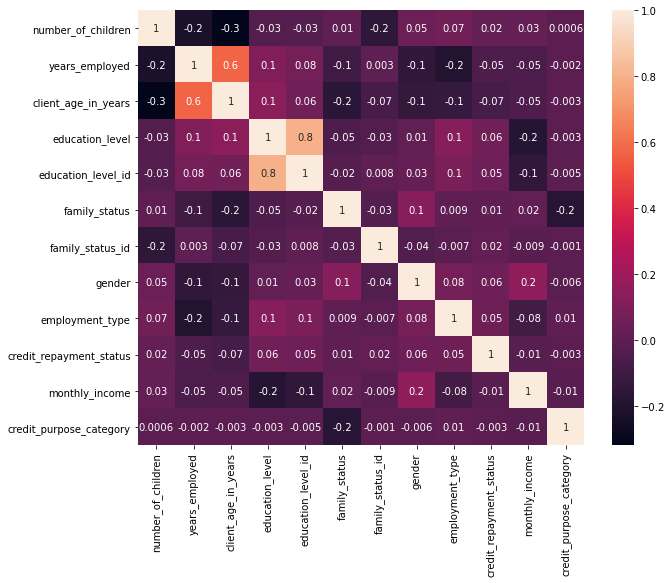

In [114]:
# Построим хитмэп корреляций
import seaborn as sns
sns.heatmap(df_encode.corr(), annot = True, fmt='.1g')

**Вывод**

* Сама по себе корреляция не показывает причинно-следственные связи, она лишь дает общее представление о взаимной зависимости признаков;
* Чтобы выяснить более точные взаимосвязи интересующих нас признаков, построим ряд сводных таблиц.

### Зависимость между наличием детей и возвратом кредита в срок

In [115]:
# Создадим сводную таблицу
children_debt = df.pivot_table(index='children_rank', columns='credit_repayment_status', values='gender', aggfunc='count')
children_debt

credit_repayment_status,0,1
children_rank,,
детей нет,13044,1063
есть дети,6337,647
многодетный,349,31


In [116]:
# Переименуем столбцы
children_debt.columns = ['no_debt', 'debt']
children_debt

,no_debt,debt
children_rank,,
детей нет,13044,1063
есть дети,6337,647
многодетный,349,31


In [117]:
# Посчитаем долю должников
children_debt['share_of_debtors'] = children_debt['debt'] / (children_debt['no_debt'] + children_debt['debt'])
children_debt

,no_debt,debt,share_of_debtors
children_rank,,,
детей нет,13044,1063,0.075353
есть дети,6337,647,0.092640
многодетный,349,31,0.081579


In [118]:
# Преобразуем значения в столбце c долей должников в проценты
children_debt['share_of_debtors'] = children_debt['share_of_debtors'].map('{:.1%}'.format)
children_debt

,no_debt,debt,share_of_debtors
children_rank,,,
детей нет,13044,1063,7.5%
есть дети,6337,647,9.3%
многодетный,349,31,8.2%


In [119]:
# Отсортируем значения по убыванию доли должников
children_debt.sort_values(by='share_of_debtors', ascending=False)

,no_debt,debt,share_of_debtors
children_rank,,,
есть дети,6337,647,9.3%
многодетный,349,31,8.2%
детей нет,13044,1063,7.5%


**Вывод**

* Наличие детей затрудняет погашение кредита в срок (9,3%). Вероятно, это связано с каким-либо дополнительными на них расходами;

* В сравнении многодетные клиенты имеют более низкий процент задолженности (8,2%), что может быть связано либо с каким-то льготными программами, либо имеет место недостаточное количество данных для данной категории;

* Клиенты без детей имеют наименьший процент задолженности (7,5%).

### Зависимость между семейным положением и возвратом кредита в срок?

In [120]:
# Создадим сводную таблицу
family_status_debt = df.pivot_table(index='family_status', columns='credit_repayment_status', values='gender', aggfunc='count')
family_status_debt

credit_repayment_status,0,1
family_status,,
в разводе,1110,85
вдовец / вдова,896,63
гражданский брак,3775,388
женат / замужем,11413,931
не женат / не замужем,2536,274


In [121]:
# Переименуем столбцы
family_status_debt.columns = ['no_debt', 'debt']
family_status_debt

,no_debt,debt
family_status,,
в разводе,1110,85
вдовец / вдова,896,63
гражданский брак,3775,388
женат / замужем,11413,931
не женат / не замужем,2536,274


In [122]:
# Посчитаем долю должников
family_status_debt['share_of_debtors'] = family_status_debt['debt'] / (family_status_debt['no_debt'] + family_status_debt['debt'])
family_status_debt

,no_debt,debt,share_of_debtors
family_status,,,
в разводе,1110,85,0.071130
вдовец / вдова,896,63,0.065693
гражданский брак,3775,388,0.093202
женат / замужем,11413,931,0.075421
не женат / не замужем,2536,274,0.097509


In [123]:
# Преобразуем значения в столбце c долей должников в проценты
family_status_debt['share_of_debtors'] = family_status_debt['share_of_debtors'].map('{:.1%}'.format)

In [124]:
# Отсортируем значения по убыванию доли должников
family_status_debt.sort_values(by='share_of_debtors', ascending=False)

,no_debt,debt,share_of_debtors
family_status,,,
не женат / не замужем,2536,274,9.8%
гражданский брак,3775,388,9.3%
женат / замужем,11413,931,7.5%
в разводе,1110,85,7.1%
вдовец / вдова,896,63,6.6%


**Вывод**

* Уровень доли должников выше среди клиентов не состоящих в официальном браке (9,8% и 9,3%). Это может быть связано с отсутствием общих накоплений в паре и наличием свободы действий;
* Более низкий уровень должников среди замужних пар и тех, кто пребывает в разводе; 
* Самый низкий уровень среди должников наблюдается среди категории вдова / вдовец (6,6%). Возможно, что на этот показатель влияет наличие имеющегося у них наследства.

### Зависимость между уровнем дохода и возвратом кредита в срок

In [125]:
# Создадим сводную таблицу
monthly_income_debt = df.pivot_table(index='monthly_income_category', columns='credit_repayment_status', values='gender', aggfunc='count')
monthly_income_debt

credit_repayment_status,0,1
monthly_income_category,,
A,23,2
B,4685,356
C,12723,1190
D,329,21
E,1970,172


In [126]:
# Переименуем столбцы
monthly_income_debt.columns = ['no_debt', 'debt']
monthly_income_debt

,no_debt,debt
monthly_income_category,,
A,23,2
B,4685,356
C,12723,1190
D,329,21
E,1970,172


In [127]:
# Посчитаем долю должников
monthly_income_debt['share_of_debtors'] = monthly_income_debt['debt'] / (monthly_income_debt['no_debt'] + monthly_income_debt['debt'])
monthly_income_debt

,no_debt,debt,share_of_debtors
monthly_income_category,,,
A,23,2,0.080000
B,4685,356,0.070621
C,12723,1190,0.085532
D,329,21,0.060000
E,1970,172,0.080299


In [128]:
# Преобразуем значения в столбце c долей должников в проценты
monthly_income_debt['share_of_debtors'] = monthly_income_debt['share_of_debtors'].map('{:.1%}'.format)

In [129]:
# Отсортируем значения по убыванию доли должников
monthly_income_debt.sort_values(by='share_of_debtors', ascending=False)

,no_debt,debt,share_of_debtors
monthly_income_category,,,
C,12723,1190,8.6%
A,23,2,8.0%
E,1970,172,8.0%
B,4685,356,7.1%
D,329,21,6.0%


**Вывод**

* Данные категорий A и D брать в расчет не будем ввиду их небольшой выборки;
* Поэтому, исходя из оставшихся данных (категории C, E и B), наибольшая вероятность стать должником есть у лиц попадающих в категорию С (от 50001 до 200000 единиц (8,6%)). А самай низкая - у лиц, попадающих в категорию B (c доходом от 200001 до 1000000 единиц (7,1%)).

### Влияние разных целей кредита на его возврат в срок

In [130]:
# Создадим сводную таблицу
credit_purpose_debt = df.pivot_table(index='credit_purpose_category', columns='credit_repayment_status', values='gender', aggfunc='count')
credit_purpose_debt

credit_repayment_status,0,1
credit_purpose_category,,
автомобиль,3905,403
недвижимость,10032,782
образование,3644,370
свадьба,2149,186


In [132]:
# Переименуем столбцы
credit_purpose_debt.columns = ['no_debt', 'debt']
credit_purpose_debt

,no_debt,debt
credit_purpose_category,,
автомобиль,3905,403
недвижимость,10032,782
образование,3644,370
свадьба,2149,186


In [133]:
# Посчитаем долю должников
credit_purpose_debt['share_of_debtors'] = credit_purpose_debt['debt'] / (credit_purpose_debt['no_debt'] + credit_purpose_debt['debt'])
credit_purpose_debt

,no_debt,debt,share_of_debtors
credit_purpose_category,,,
автомобиль,3905,403,0.093547
недвижимость,10032,782,0.072314
образование,3644,370,0.092177
свадьба,2149,186,0.079657


In [134]:
# Преобразуем значения в столбце c долей должников в проценты
credit_purpose_debt['share_of_debtors'] = credit_purpose_debt['share_of_debtors'].map('{:.1%}'.format)
credit_purpose_debt

,no_debt,debt,share_of_debtors
credit_purpose_category,,,
автомобиль,3905,403,9.4%
недвижимость,10032,782,7.2%
образование,3644,370,9.2%
свадьба,2149,186,8.0%


In [135]:
# Отсортируем значения по убыванию доли должников
credit_purpose_debt.sort_values(by='share_of_debtors', ascending=False)

,no_debt,debt,share_of_debtors
credit_purpose_category,,,
автомобиль,3905,403,9.4%
образование,3644,370,9.2%
свадьба,2149,186,8.0%
недвижимость,10032,782,7.2%


**Вывод**

* Наибольшая доля вероятности стать должником у клиентов цель кредита которых автомобиль и получение образования (9,4% и 9,2% соответственно);
* Наименьшее количество должников наблюдается среди тех, кто берет кредит на недвижимость. Это может быть связно с большей долей ответственности при покупке физического недвижимого имущества.

## Общий вывод

* Наличие детей увеличивает риск задолженности;
* Холостые люди и люди, состоящие в гражданском браке, склонны к большему риску стать должниками;
* Лица с доходами от 50001 до 200000 единиц склонны к большему риску стать должниками;
* Клиенты, цели которых является покупка автомобиля и получение образования, склонны к большему риску стать должниками.